In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

In [ ]:
#pip freeze > requirements.txt

### Funzioni

Di seguito sono riportate tutte le funzioni utilizzate in questo progetto

In [ ]:
def class_report_hold_out(model, X_train, X_test,y_train,y_test):

    y_pred_train = model.predict(X_train)
    y_pred_test= model.predict(X_test)

    print('TRAIN TEST:\n')
    print(classification_report(y_train, y_pred_train))
    print(20*' - ')
    print('TEST TEST:\n')
    print(classification_report(y_test, y_pred_test))


def plot_cm_hold_out (model, X_train, X_test,y_train,y_test):

    y_pred_train = model.predict(X_train)
    y_pred_test= model.predict(X_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    df_cm_train = pd.DataFrame(cm_train,
                    index = ['0','1'],
                    columns = ['Predicted 0', 'Predicted 1'])

    df_cm_test = pd.DataFrame(cm_test,
                    index = ['0','1'],
                    columns = ['Predicted 0', 'Predicted 1'])



    plt.figure(figsize=(20,10))
    fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
    sns.heatmap(df_cm_train, ax = ax1, annot = True, fmt = 'g')
    sns.heatmap(df_cm_test, ax = ax2, annot = True, fmt = 'g')
    plt.subplots_adjust(hspace=0.5)
    ax1.set_title('TRAIN SET')
    ax2.set_title('TEST SET')
    plt.show()

In [ ]:
def mine_cv(model,X, y, std=0, norm=0):

    accuracy_train = []
    precision_1_train = []
    recall_1_train = []
    precision_0_train = []
    recall_0_train = []

    accuracy_test = []
    precision_1_test = []
    recall_1_test = []
    precision_0_test = []
    recall_0_test = []

    kf= KFold(n_splits=5, shuffle=True, random_state=0)

    for train_index, test_index in kf.split(X):

        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        if std == 1:
            sd = StandardScaler()
            X_train = sd.fit_transform(X_train)
            X_test = sd.transform(X_test)

        if norm == 1:
            mms = MinMaxScaler()
            X_train = mms.fit_transform(X_train)
            X_test = mms.transform(X_test)


        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))

        precision_0_train.append(precision_score(y_train, y_train_pred, pos_label=0))
        precision_1_train.append(precision_score(y_train, y_train_pred, pos_label=1))
        precision_0_test.append(precision_score(y_test, y_test_pred, pos_label=0))
        precision_1_test.append(precision_score(y_test, y_test_pred, pos_label=1))

        recall_0_train.append(recall_score(y_train, y_train_pred, pos_label=0))
        recall_1_train.append(recall_score(y_train, y_train_pred, pos_label=1))
        recall_0_test.append(recall_score(y_test, y_test_pred, pos_label=0))
        recall_1_test.append(recall_score(y_test, y_test_pred, pos_label=1))

    df_scores_train = pd.DataFrame(data = {
        'accuracy': np.array(accuracy_train),
        'precision_1': np.array(precision_1_train),
        'precision_0': np.array(precision_0_train),
        'recall_1': np.array(recall_1_train),
        'recall_0':np.array(recall_0_train)
    })

    df_scores_test = pd.DataFrame(data = {
        'accuracy': np.array(accuracy_test),
        'precision_1': np.array(precision_1_test),
        'precision_0': np.array(precision_0_test),
        'recall_1': np.array(recall_1_test),
        'recall_0':np.array(recall_0_test)
    })

    return df_scores_train, df_scores_test

In [ ]:
def under(X, y, k):
    #k is the ratio between the n osservation of the most represented class and the n osservation of
    #the least represented class

    undersampling = RandomUnderSampler(sampling_strategy=k, random_state=0)
    X_under, y_under = undersampling.fit_resample(X, y)

    return X_under, y_under

def under_over(X, y, k_under, k_over):
    under = RandomUnderSampler(sampling_strategy= k_under)
    over = SMOTE(sampling_strategy=k_over)

    X_under, y_under = under.fit_resample(X,y)
    X_under_over,y_under_over = over.fit_resample(X_under,y_under)

    return X_under_over, y_under_over


def oversampling(X, y, k_over):

    over = SMOTE(sampling_strategy=k_over)
    X_over, y_over = over.fit_resample(X,y)

    return X_over, y_over


In [ ]:
#CV with undersampling of the Training Set

def mine_cv_under(model,X, y, std=0, norm=0, k_under = 1):

    #k_under is the ratio between the n osservation of the most represented class and the n osservation of the least represented class
    accuracy_train = []
    precision_1_train = []
    recall_1_train = []
    precision_0_train = []
    recall_0_train = []

    accuracy_test = []
    precision_1_test = []
    recall_1_test = []
    precision_0_test = []
    recall_0_test = []

    kf= KFold(n_splits=5, shuffle=True, random_state=0)

    for train_index, test_index in kf.split(X):

        X_train, y_train = X[train_index], y[train_index]
        X_train, y_train = under(X_train, y_train, k = k_under)

        X_test, y_test = X[test_index], y[test_index]

        if std == 1:
            sd = StandardScaler()
            X_train = sd.fit_transform(X_train)
            X_test = sd.transform(X_test)

        if norm == 1:
            mms = MinMaxScaler()
            X_train = mms.fit_transform(X_train)
            X_test = mms.transform(X_test)


        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))

        precision_0_train.append(precision_score(y_train, y_train_pred, pos_label=0))
        precision_1_train.append(precision_score(y_train, y_train_pred, pos_label=1))
        precision_0_test.append(precision_score(y_test, y_test_pred, pos_label=0))
        precision_1_test.append(precision_score(y_test, y_test_pred, pos_label=1))

        recall_0_train.append(recall_score(y_train, y_train_pred, pos_label=0))
        recall_1_train.append(recall_score(y_train, y_train_pred, pos_label=1))
        recall_0_test.append(recall_score(y_test, y_test_pred, pos_label=0))
        recall_1_test.append(recall_score(y_test, y_test_pred, pos_label=1))

    df_scores_train = pd.DataFrame(data = {
        'accuracy': np.array(accuracy_train),
        'precision_1': np.array(precision_1_train),
        'precision_0': np.array(precision_0_train),
        'recall_1': np.array(recall_1_train),
        'recall_0':np.array(recall_0_train)
    })

    df_scores_test = pd.DataFrame(data = {
        'accuracy': np.array(accuracy_test),
        'precision_1': np.array(precision_1_test),
        'precision_0': np.array(precision_0_test),
        'recall_1': np.array(recall_1_test),
        'recall_0':np.array(recall_0_test)
    })

    return df_scores_train, df_scores_test

In [ ]:
#CV with undersampling and oversampling (SMOTE) of the Training Set

def mine_cv_under_over(model,X, y, std=0, norm=0, k_under = 0.5, k_over = 1):

    #k_under is the ratio between the n osservation of the most represented class and the n osservation of the least represented class
    accuracy_train = []
    precision_1_train = []
    recall_1_train = []
    precision_0_train = []
    recall_0_train = []

    accuracy_test = []
    precision_1_test = []
    recall_1_test = []
    precision_0_test = []
    recall_0_test = []

    kf= KFold(n_splits=5, shuffle=True, random_state=0)

    for train_index, test_index in kf.split(X):

        X_train, y_train = X[train_index], y[train_index]
        X_train, y_train = under_over(X_train, y_train, k_under = k_under, k_over = k_over)

        X_test, y_test = X[test_index], y[test_index]

        if std == 1:
            sd = StandardScaler()
            X_train = sd.fit_transform(X_train)
            X_test = sd.transform(X_test)

        if norm == 1:
            mms = MinMaxScaler()
            X_train = mms.fit_transform(X_train)
            X_test = mms.transform(X_test)


        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))

        precision_0_train.append(precision_score(y_train, y_train_pred, pos_label=0))
        precision_1_train.append(precision_score(y_train, y_train_pred, pos_label=1))
        precision_0_test.append(precision_score(y_test, y_test_pred, pos_label=0))
        precision_1_test.append(precision_score(y_test, y_test_pred, pos_label=1))

        recall_0_train.append(recall_score(y_train, y_train_pred, pos_label=0))
        recall_1_train.append(recall_score(y_train, y_train_pred, pos_label=1))
        recall_0_test.append(recall_score(y_test, y_test_pred, pos_label=0))
        recall_1_test.append(recall_score(y_test, y_test_pred, pos_label=1))

    df_scores_train = pd.DataFrame(data = {
        'accuracy': np.array(accuracy_train),
        'precision_1': np.array(precision_1_train),
        'precision_0': np.array(precision_0_train),
        'recall_1': np.array(recall_1_train),
        'recall_0':np.array(recall_0_train)
    })

    df_scores_test = pd.DataFrame(data = {
        'accuracy': np.array(accuracy_test),
        'precision_1': np.array(precision_1_test),
        'precision_0': np.array(precision_0_test),
        'recall_1': np.array(recall_1_test),
        'recall_0':np.array(recall_0_test)
    })

    return df_scores_train, df_scores_test

In [ ]:
#CV with oversampling (SMOTE) of the Training Set

def mine_cv_over(model,X, y, std=0, norm=0, k_over = 1):

    #k_under is the ratio between the n osservation of the most represented class and the n osservation of the least represented class
    accuracy_train = []
    precision_1_train = []
    recall_1_train = []
    precision_0_train = []
    recall_0_train = []

    accuracy_test = []
    precision_1_test = []
    recall_1_test = []
    precision_0_test = []
    recall_0_test = []

    kf= KFold(n_splits=5, shuffle=True, random_state=0)

    for train_index, test_index in kf.split(X):

        X_train, y_train = X[train_index], y[train_index]
        X_train, y_train = oversampling(X_train, y_train, k_over = k_over)

        X_test, y_test = X[test_index], y[test_index]

        if std == 1:
            sd = StandardScaler()
            X_train = sd.fit_transform(X_train)
            X_test = sd.transform(X_test)

        if norm == 1:
            mms = MinMaxScaler()
            X_train = mms.fit_transform(X_train)
            X_test = mms.transform(X_test)


        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))

        precision_0_train.append(precision_score(y_train, y_train_pred, pos_label=0))
        precision_1_train.append(precision_score(y_train, y_train_pred, pos_label=1))
        precision_0_test.append(precision_score(y_test, y_test_pred, pos_label=0))
        precision_1_test.append(precision_score(y_test, y_test_pred, pos_label=1))

        recall_0_train.append(recall_score(y_train, y_train_pred, pos_label=0))
        recall_1_train.append(recall_score(y_train, y_train_pred, pos_label=1))
        recall_0_test.append(recall_score(y_test, y_test_pred, pos_label=0))
        recall_1_test.append(recall_score(y_test, y_test_pred, pos_label=1))

    df_scores_train = pd.DataFrame(data = {
        'accuracy': np.array(accuracy_train),
        'precision_1': np.array(precision_1_train),
        'precision_0': np.array(precision_0_train),
        'recall_1': np.array(recall_1_train),
        'recall_0':np.array(recall_0_train)
    })

    df_scores_test = pd.DataFrame(data = {
        'accuracy': np.array(accuracy_test),
        'precision_1': np.array(precision_1_test),
        'precision_0': np.array(precision_0_test),
        'recall_1': np.array(recall_1_test),
        'recall_0':np.array(recall_0_test)
    })

    return df_scores_train, df_scores_test

In [ ]:
def test_undersampling(X, y, k_int):
    #k_int = array of sampling_strategy values
    scores_train_under = []
    scores_test_under = []

    for i in k_int:

        scores_train, scores_test = mine_cv_under(model, X, y, k_under = i, std = 1)

        scores_train_under.append(np.array(scores_train))
        scores_test_under.append(np.array(scores_test))

    return np.array(scores_train_under), np.array(scores_test_under)

def test_under_over_sampling(X, y, k_int):
    #k_int = array of sampling_strategy values
    scores_train_under_over = []
    scores_test_under_over = []

    for i in k_int:

        scores_train, scores_test = mine_cv_under_over(model, X, y, k_under = i, k_over = 1, std = 1)

        scores_train_under_over.append(np.array(scores_train))
        scores_test_under_over.append(np.array(scores_test))

    return np.array(scores_train_under_over), np.array(scores_test_under_over)


def test_oversampling(X, y, k_int):
    #k_int = array of sampling_strategy values
    scores_train_over = []
    scores_test_over = []

    for i in k_int:

        scores_train, scores_test = mine_cv_over(model, X, y, k_over = i, std = 1)

        scores_train_over.append(np.array(scores_train))
        scores_test_over.append(np.array(scores_test))

    return np.array(scores_train_over), np.array(scores_test_over)


In [ ]:
def plot_comp_sampling_strategy(scores_train, scores_test, x_ax, title):

    plt.figure(figsize=(5,3))
    x= x_ax
    plt.plot(x, np.transpose(scores_train)[0].mean(axis=0), marker = 'o', label = 'Train')
    plt.plot(x, np.transpose(scores_test)[0].mean(axis=0), marker = 'o', label = 'Test')
    plt.ylabel('Accuracy')
    plt.xlabel('N_1/N_0')
    plt.legend()
    plt.title('Accuracy - '+title)
    plt.show()


    x_int = [x_ax[0]-0.1,x_ax[-1]+0.1]
    y_int = [0, 1]

    plt.figure(figsize = (20,15))
    fig, axs = plt.subplots(2,2)
    axs[0,0].plot(x,np.transpose(scores_train)[1].mean(axis=0), marker = 'o', label = 'Train')
    axs[0,0].plot(x,np.transpose(scores_test)[1].mean(axis=0), marker = 'o', label = 'Test')
    axs[0,0].set_xlabel('N_1/N_0')
    axs[0,0].set_ylabel('Precision')
    axs[0,0].set_title('Precision 1')
    axs[0,0].legend()
    axs[0,0].set_xlim(x_int)
    axs[0,0].set_ylim(y_int)

    axs[0,1].plot(x,np.transpose(scores_train)[2].mean(axis=0), marker = 'o', label = 'Train')
    axs[0,1].plot(x,np.transpose(scores_test)[2].mean(axis=0), marker = 'o', label = 'Test')
    axs[0,1].set_xlabel('N_1/N_0')
    axs[0,1].set_ylabel('Precision')
    axs[0,1].set_title('Precision 0')
    axs[0,1].legend()
    axs[0,1].set_xlim(x_int)
    axs[0,1].set_ylim(y_int)

    axs[1,0].plot(x,np.transpose(scores_train)[3].mean(axis=0), marker = 'o', label = 'Train')
    axs[1,0].plot(x,np.transpose(scores_test)[3].mean(axis=0), marker = 'o', label = 'Test')
    axs[1,0].set_xlabel('N_1/N_0')
    axs[1,0].set_ylabel('Recall')
    axs[1,0].set_title('Recall 1')
    axs[1,0].legend()
    axs[1,0].set_xlim(x_int)
    axs[1,0].set_ylim(y_int)

    axs[1,1].plot(x,np.transpose(scores_train)[4].mean(axis=0), marker = 'o', label = 'Train')
    axs[1,1].plot(x,np.transpose(scores_test)[4].mean(axis=0), marker = 'o', label = 'Test')
    axs[1,1].set_xlabel('N_1/N_0')
    axs[1,1].set_ylabel('Recall')
    axs[1,1].set_title('Recall 0')
    axs[1,1].legend()
    axs[1,1].set_xlim(x_int)
    axs[1,1].set_ylim(y_int)

    for ax in fig.get_axes():
        ax.label_outer()

    plt.subplots_adjust(hspace=0.5, wspace = 0.1)
    fig.suptitle(title)
    plt.show()

### Analisi del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CHANGE PATH depending on the directory of CSV file
PATH = '/content/drive/MyDrive/MASTER DATA SCIENCE/4 - Fondamenti di Machine Learning/'
df = pd.read_csv(PATH+'insurance_cross_sell.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.shape

(381109, 12)

Il dataset contiene 381109 osservazioni ciascuna descritta da 12 variabili di cui una è l'id che non sarà considerato d'ora in avanti.

In particolare 3 variabili sono quantitative (Age, Annual_Premium e Vintage) mentre le restanti 8 sono qualitative (Gender, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Age, Vehicle_Damage, Policy_Sales_Channe, Response).

In [ ]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Si nota che nel dataset non sono presenti valori mancanti.

Di seguito sono riportati media, deviazione standard, minimo e massimo, 25° e 75° percentile per le variabili quantitative.

In [ ]:
var_quant = ['Age','Annual_Premium','Vintage']
var_qual = ['Gender','Driving_License','Region_Code','Previously_Insured',
            'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel','Response']

round(df[var_quant].describe(),3)

,Age,Annual_Premium,Vintage
count,381109.000,381109.000,381109.000
mean,38.823,30564.390,154.347
std,15.512,17213.155,83.671
min,20.000,2630.000,10.000
25%,25.000,24405.000,82.000
50%,36.000,31669.000,154.000
75%,49.000,39400.000,227.000
max,85.000,540165.000,299.000


Di seguito è riportata la distribuizione di frequenze assolute per le variabili qualitative.

In [ ]:
for item in var_qual:
    print(df[item].value_counts())
    print(20*' - ')



Male      206089
Female    175020
Name: Gender, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
1    380297
0       812
Name: Driving_License, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
23.0      1960
31.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0   

In [ ]:
df['Response'].value_counts(normalize=True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

Si nota che la variabile Response, che sarà la variabile target del modello, è nettamente sbilanciata, infatti in quasi l'88% delle osservazioni assume il valore 0.

In [ ]:
df.Policy_Sales_Channel.unique().shape

(155,)

In [ ]:
df.Policy_Sales_Channel.value_counts().sort_values(ascending=True)

Policy_Sales_Channel
41.0          1
84.0          1
123.0         1
143.0         1
43.0          1
          ...  
156.0     10661
160.0     21779
124.0     73995
26.0      79700
152.0    134784
Name: count, Length: 155, dtype: int64

In [ ]:
ind_under = df['Policy_Sales_Channel'].value_counts()<200

In [ ]:
df[df.Policy_Sales_Channel.isin(ind_under[ind_under==True].index)].shape

(5125, 12)

Inoltre, si evidezia che la variabile Policy_Sales_Channel assume 155 modalità distinte e 5125 ossrvazioni del dataset hanno una modalità di tale variabile assunta in meno di 200 osservazioni.

### Encoding variabili qualitative

E' stato eseguito l'ordinal encoding delle variabili qualitative le cui modalità erano espresse mediante stringa di testo.

In [ ]:
mapping = {'Male': 0, 'Female': 1}
df['Gender']=df['Gender'].map(lambda x: mapping[x])


In [ ]:
mapping = {'1-2 Year':0,'< 1 Year':1, '> 2 Years':2 }
df['Vehicle_Age']=df['Vehicle_Age'].map(lambda x: mapping[x])

In [ ]:
mapping = {'No':0,'Yes':1}
df['Vehicle_Damage']=df['Vehicle_Damage'].map(lambda x: mapping[x])

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [ ]:
df_1 = df #database after ordinal encoding

### Valutazione correlazione

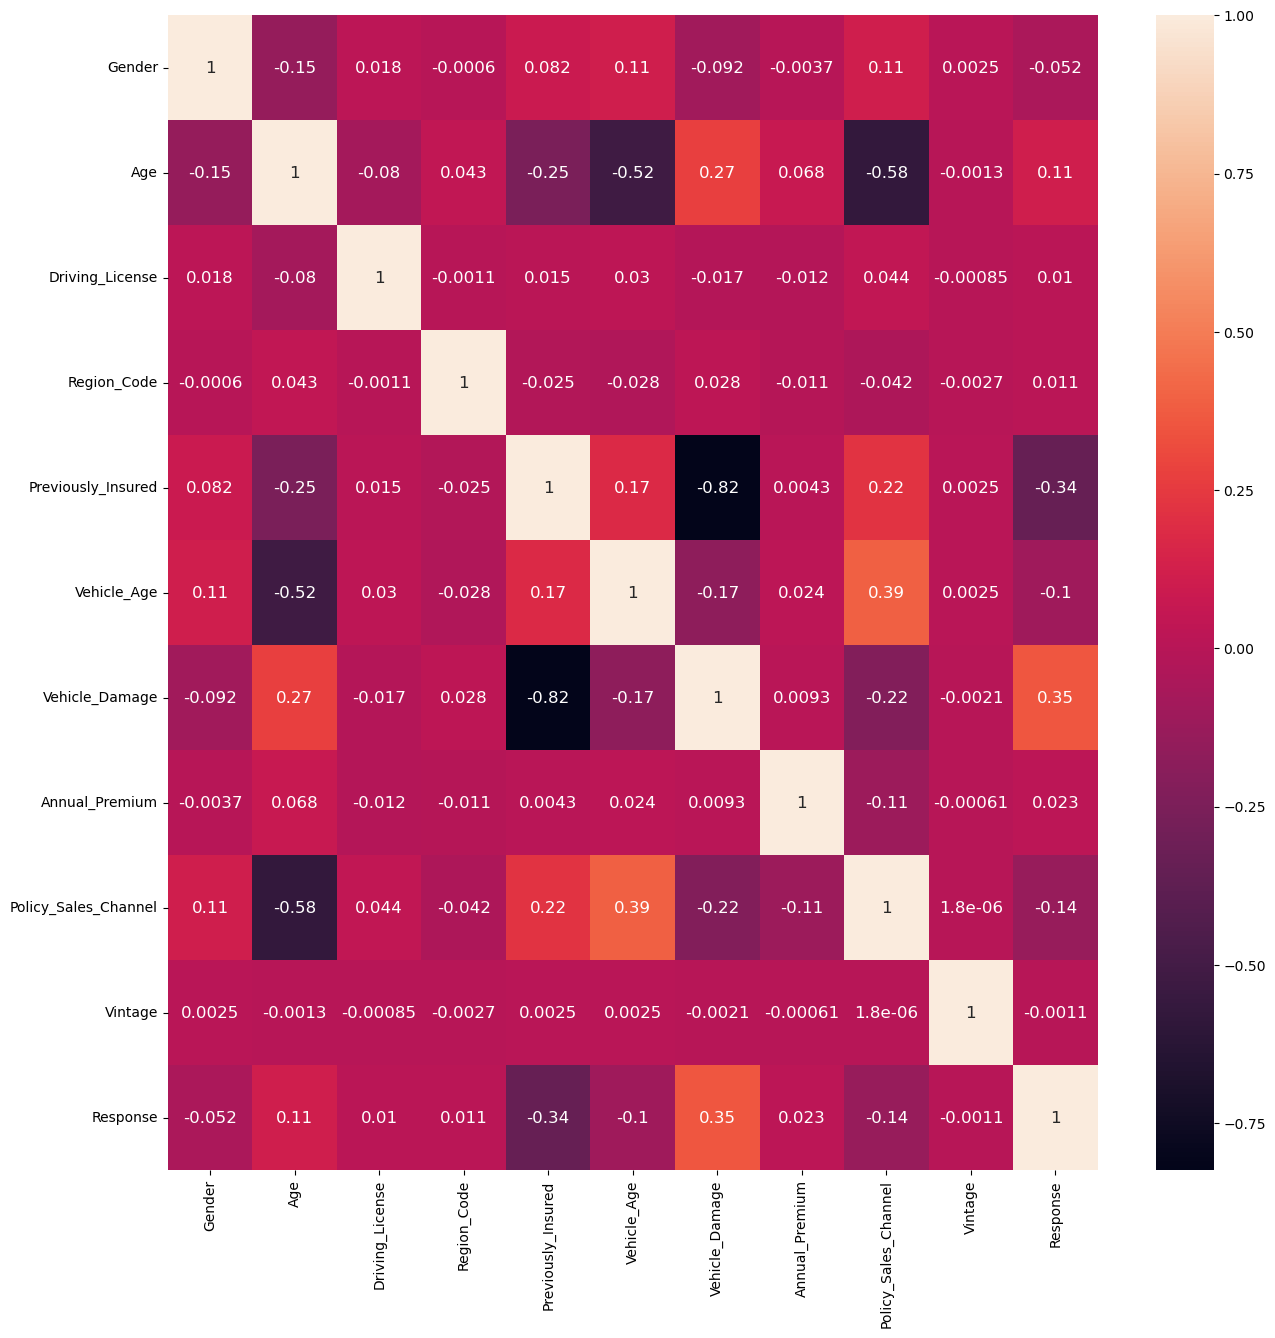

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.drop('id',axis = 1).corr(), annot = True, annot_kws={'size':12})
plt.show()

Dalla matrice di correlazione è possibile notare che la variabile target Response è correlata maggiormente con le variabili Previously_Insured e Vehicle_Demage e in maniera inferiore con le variabili Vehicle_Age e Policy_Sales_Channel.

### Tabelle di contingenza
Di seguito sono riportate le tabella di contingenza che mettono in relazione le variabili Vehicle_Damage e Previously_Insured con la variabile target Response e i relativi grafici a barre.

In [ ]:
pd.crosstab(df.Vehicle_Damage, df.Response)

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


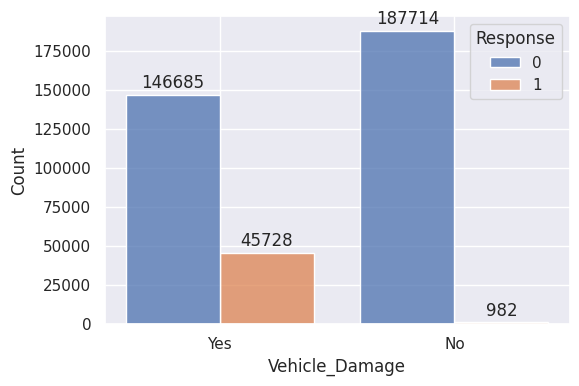

In [ ]:
plt.figure(figsize=(6,4))
sns.set_theme()
sns.histplot(data = df, x = 'Vehicle_Damage', hue = 'Response', multiple='dodge',
             stat='count',shrink=.8)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='bottom', xytext=(0,2), textcoords='offset points')
plt.show()


Si evince che chi ha subito un danno al veicolo sottoscrive più frequentemente una polizza rispetto a chi non l'ha subito.

In [ ]:
pd.crosstab(df.Previously_Insured, df.Response)

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


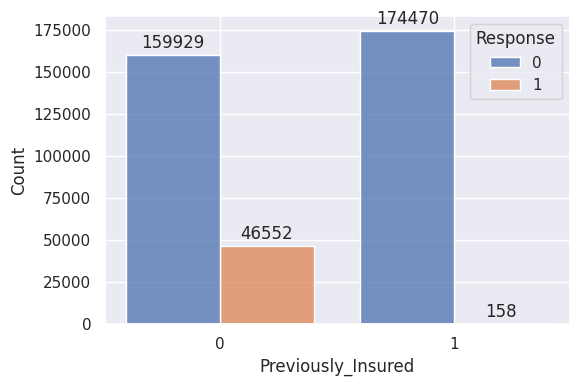

In [ ]:
plt.figure(figsize=(6,4))
sns.set_theme()
sns.histplot(data = df, x = 'Previously_Insured', hue = 'Response', multiple='dodge',
             stat='count',shrink=.8, discrete = True)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='bottom', xytext=(0,2), textcoords='offset points')
plt.xticks(ticks = [0,1], labels = ['0','1'])
plt.show()

In [ ]:
pd.crosstab(df.Previously_Insured, df.Response, normalize = 'index')

Response,0,1
Previously_Insured,,
0,0.774546,0.225454
1,0.999095,0.000905


Si nota che chi era già assicurato tende a sottoscrivere di meno la polizza risetto a chi non lo era. In particolare solo lo 0.09% di chi aveva già un'assicurazione ne sottoscrive un'altra.

Di seguito è riportata la tabella di contingenza delle variabili Policy_Sales_Channel e Response, i valori sono normalizzati rispetto alle righe quindi per ciascuna modalità della variabile Policy_Sales_Channel è mostrata la fequenza relativa della variabile Response. Si nota che per alcune modalità è sensibilmente maggiore la percentuale di risposta positiva.




In [ ]:
ind_under = df.Policy_Sales_Channel.value_counts()>200

df_Policy_over = df[df.Policy_Sales_Channel.isin(ind_under[ind_under==True].index)]

pd.crosstab(df_Policy_over.Policy_Sales_Channel, df_Policy_over.Response, normalize = 'index').sort_values(by=[1], ascending=False)



Response,0,1
Policy_Sales_Channel,,
155.0,0.679903,0.320097
163.0,0.695817,0.304183
3.0,0.695985,0.304015
158.0,0.725610,0.274390
157.0,0.731598,0.268402
31.0,0.746434,0.253566
154.0,0.754046,0.245954
150.0,0.756410,0.243590
156.0,0.784542,0.215458


### Primo modello con tutte le variabili e l'intero dataset

#### Hold-out

Sono stati creati due modelli dividendo l'intero dataset in Training Set, usato per addestrare il modello, e in Test Set utilizzato esclusivamente per valutare le prestazioni del modello e confrontarle con quelle ottenute sul training set. Questo approccio consente di valutare l'eventuale presenza di overfitting. In particolare, il primo modello è stato realizzato applicando una standardizzazione alle variabili mentre il secondo una normalizzazione.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [ ]:
class_report_hold_out(model, X_train, X_test,y_train,y_test)

TRAIN TEST:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    267553
           1       1.00      0.00      0.00     37334

    accuracy                           0.88    304887
   macro avg       0.94      0.50      0.47    304887
weighted avg       0.89      0.88      0.82    304887

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
TEST TEST:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



<Figure size 2000x1000 with 0 Axes>

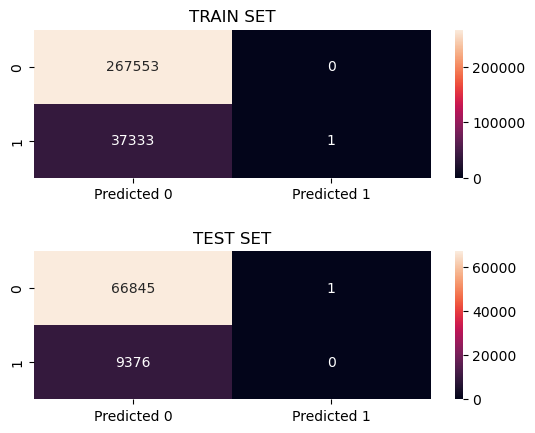

In [ ]:
plot_cm_hold_out(model, X_train, X_test, y_train, y_test)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [ ]:
class_report_hold_out(model, X_train, X_test,y_train,y_test)

TRAIN TEST:



C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    267553
           1       0.00      0.00      0.00     37334

    accuracy                           0.88    304887
   macro avg       0.44      0.50      0.47    304887
weighted avg       0.77      0.88      0.82    304887

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
TEST TEST:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 2000x1000 with 0 Axes>

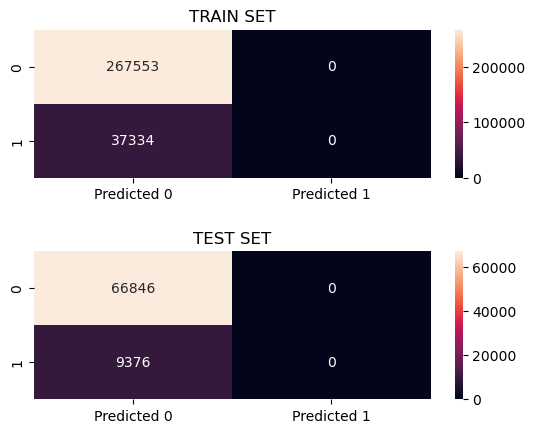

In [ ]:
plot_cm_hold_out(model, X_train, X_test, y_train, y_test)

#### Cross-validation

Sono stati, in seguto, creati altri due modelli utilizzando la tecnica della cross-validation, anche in questo caso le variabili sono state standardizzate nel primo modello e normalizzate nel secondo.

In [ ]:
model = LogisticRegression()
scores_train, scores_test = mine_cv(model,X, y, std = 1)

C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classifica

In [ ]:
scores_train.mean()

accuracy       0.877436
precision_1    0.400000
precision_0    0.877438
recall_1       0.000016
recall_0       0.999997
dtype: float64

In [ ]:
scores_test.mean()

accuracy       0.877434
precision_1    0.000000
precision_0    0.877436
recall_1       0.000000
recall_0       0.999997
dtype: float64

In [ ]:
scores_train, scores_test = mine_cv(model,X, y, norm = 1)

C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesco Gardini\anaconda3\Lib\site-packages\sklearn\metrics\_classifica

In [ ]:
scores_train.mean()

accuracy       0.877435
precision_1    0.100000
precision_0    0.877437
recall_1       0.000005
recall_0       0.999997
dtype: float64

In [ ]:
scores_test.mean()

accuracy       0.877434
precision_1    0.000000
precision_0    0.877436
recall_1       0.000000
recall_0       0.999997
dtype: float64

Osservando sia il risultato del metodo hold-out che quello della cross-validation si nota come le prestazioni del modello siano simili tra il train set e il test set, il che indica l'assenza di overfitting. Tuttavia, è evidente come il modello non sia in grado di classificare correttamente le osservazioni appartenenti alla classe 1. Nonostante un valare dell'accuratezza pari al 88% sia nel train che nel test set, la precisione e il recall relativamente alla classe 1 sono pari a 0. Questo avviene sia in caso di normalizzazione che di standardizzazione delle variabili di input.
Una spiegazione potrebbe risiedere nel fatto che il dataset sia fortemente sbilanciato, come detto prima infatti, circa l'88% delle osservazioni appartiene alla classe 0, l'accuratezza del modello riflette quindi la distribuzione delle osservazioni nelle due classi.

### Sampling classe 1

Per affrontare il problema dello sbilanciamento tra le classi del dataset le tecniche più utilizzate sono:
* Undersampling: si considera per l'addestramento del modello solo una parte delle osservazioni della classe più numerosa.
* Oversampling: vengono creati più esempi della classe meno numerosa per bilanciare il dataset.
* Combinazione di undersampling e oversampling

Per valutare i parametri delle funzioni di sampling sono state create apposite funzioni, in particolare il sampling è stato effettuato esclusivamente sul training set di ciascun fold della cross-validation.

### Random Undersampling classe 1
Per quanto concerne l'undersampling, sono stati addestrati 5 modelli con un rapporto tra la classe meno rappresentata (classe 1) e quella più rappresenata (classe 0) tra 0.5 e 1.

In [ ]:
X = df_1.drop(['id','Response'],axis = 1).values
y = df_1['Response'].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

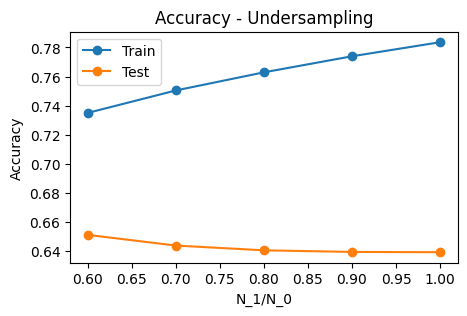

<Figure size 2000x1500 with 0 Axes>

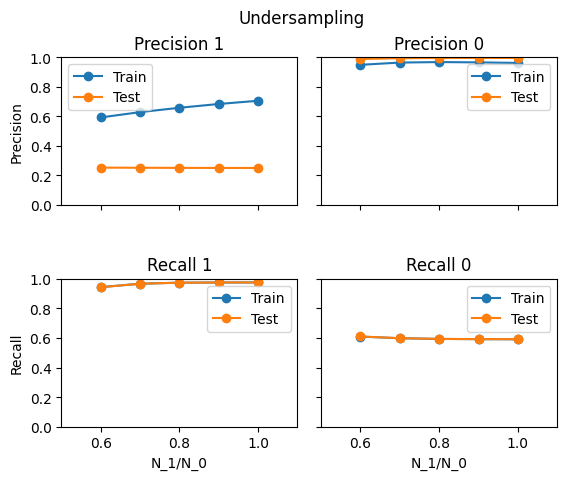

In [ ]:
model = LogisticRegression()
scores_train_under, scores_test_under = test_undersampling(X_train_1, y_train_1, np.arange(0.5,1,0.1)+0.1)

plot_comp_sampling_strategy(scores_train_under, scores_test_under, x_ax = np.arange(0.5,1,0.1)+0.1,title = 'Undersampling')

Si nota come l'accuratezza aumenti all'aumentare del rapporto tra la numerosità delle classi, così come la precisione relativamente alla classe 1 sul training set mentre tende a diminuire sul Test Set. La precisione per la classe 1 è molto diversa tra Test e Training Set mentre le altre metriche si equivalgono tra i due set. Si nota come sia aumentato il recall della classe 1 rispetto al modello addestrato sul dataset originale.

### Undersampling e Oversampling (SMOTE)

Per effettuare l'oversampling è stato utilizzato il metodo SMOTE che consiste nel creare nuove osservazioni appartenenti alle classe minoritaria in cui i valori delle features sono generati casualmente a partire da valori simili alle osservazioni appartenenti alla classe minoritaria.

Questa tecnica è stata combinata con un undersampling iniziale del dataset così da ridurre la differenza tra la numerosità delle due classi.

Nelle prove seguenti si è testato il rapporto ottimale tra le classi prima di effettuare un oversampling per portare il numero di osservazione della classe 1 in parità con il numero di osservazione della classe 0.

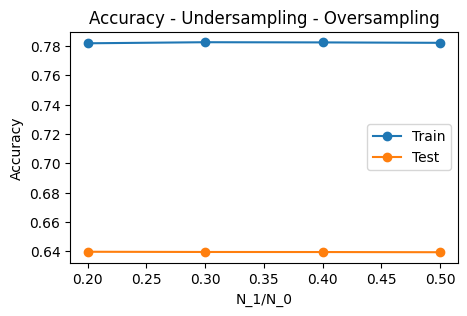

<Figure size 2000x1500 with 0 Axes>

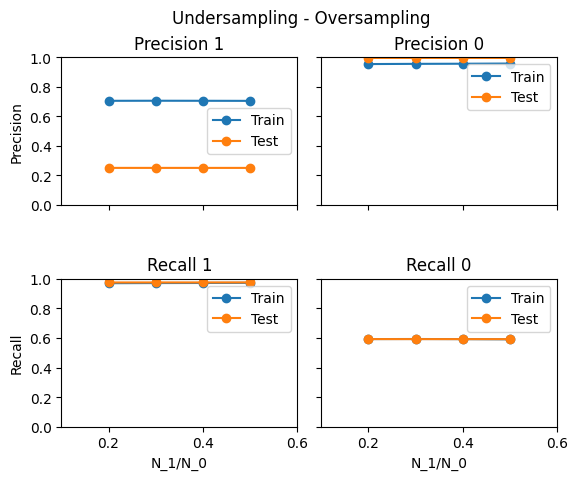

In [ ]:
scores_train_under_over, scores_test_under_over = test_under_over_sampling(X, y, np.arange(0.2,0.6,0.1))

plot_comp_sampling_strategy(scores_train_under_over, scores_test_under_over,
                            x_ax = np.arange(0.2,0.6,0.1),title = 'Undersampling - Oversampling')

Tutte le metriche non variano in maniera significativa al variare del rapporto  tra la numerosità delle due classi prima dell'oversampling. Anche in questo caso si nota la differenza tra il Training set e il Test set sia per quanto riguarda l'accuratezza che per quanto riguarda la precisione della classe 1.

### One-hot encoding delle variabili Gender e Vehicle_Age

In questa sezione, si è provato a codificare le variabili Gender e Vehicle_Age con il metodo one-hot che consiste nel creare nuove features pari al numero di modalità della variabile in oggetto.

In [ ]:
PATH = '/content/drive/MyDrive/MASTER DATA SCIENCE/4 - Fondamenti di Machine Learning/'
df_2 = pd.read_csv(PATH+'insurance_cross_sell.csv')

In [ ]:
mapping = {'No':0,'Yes':1}
df_2['Vehicle_Damage']=df_2['Vehicle_Damage'].map(lambda x: mapping[x])

In [ ]:
df_2 = pd.get_dummies(df_2,columns=['Gender','Vehicle_Age'])

In [ ]:
df_2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1,0,0,1
1,2,76,1,3.0,0,0,33536.0,26.0,183,0,0,1,1,0,0
2,3,47,1,28.0,0,1,38294.0,26.0,27,1,0,1,0,0,1
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0,1,0
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,1,0,0,1,0


Come nel dateset precedente è stato applicato prima l'undersampling e poi l'oversampling, anche in questo caso sono state condotte diverse prove per verificare il grado di undersampling ideale.

In [ ]:
X = df_2.drop(['id','Response'],axis = 1).values
y = df_2['Response'].values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size = .2, random_state=0)
model = LogisticRegression()

scores_train_under_over, scores_test_under_over = test_under_over_sampling(X_train_2, y_train_2, np.arange(0.2,0.6,0.1))
plot_comp_sampling_strategy(scores_train_under_over, scores_test_under_over,
                            x_ax = np.arange(0.2,0.6,0.1),title = 'Undersampling - Oversampling ONE-HOT ENCODING')

Anche in questo caso al variare del rapporto tra la numerosità delle classi prima dell'oversampling non cambiano significativamente accuratezza, precisione e recall. Nuovamente, si nota la differenza tra il Training set e il Test set sia per quanto riguarda l'accuratezza che per quanto riguarda la precisione della classe 1.

### One-hot encoding variabile Policy_Sales_Channel

Il metodo one-hot encoding è stato applicato anche alla variabili Policy_Sales_Channel, sono state quindi create 155 nuove features, pari alle modalità della variabile.

In [ ]:
df_3 = pd.get_dummies(df_2,columns=['Policy_Sales_Channel'])

In [ ]:
df_3.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Gender_Female,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,1,44,1,28.0,0,1,40454.0,217,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,76,1,3.0,0,0,33536.0,183,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,47,1,28.0,0,1,38294.0,27,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,21,1,11.0,1,0,28619.0,203,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,29,1,41.0,1,0,27496.0,39,0,1,...,1,0,0,0,0,0,0,0,0,0


E' stato, quindi, seguito lo stesso metodo descritto in precedenza

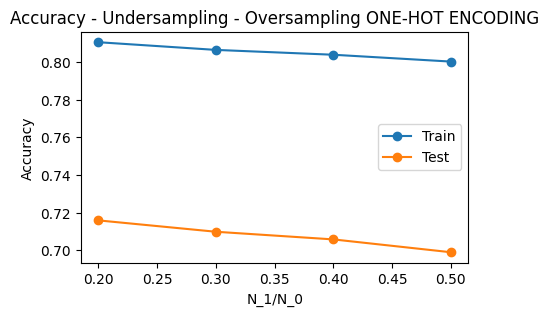

<Figure size 2000x1500 with 0 Axes>

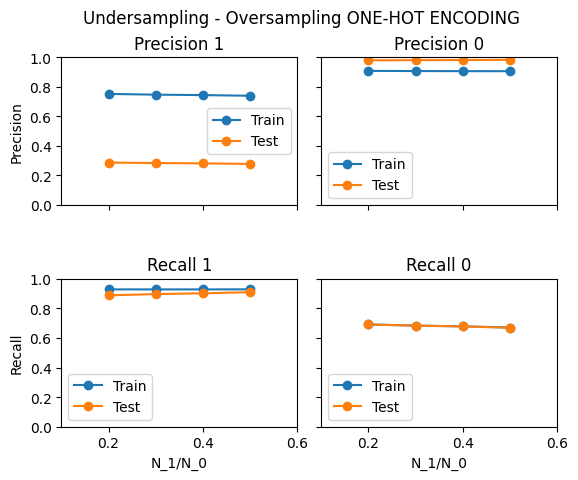

In [ ]:
X = df_3.drop(['id','Response'],axis = 1).values
y = df_3['Response'].values

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = .2, random_state=0)
model = LogisticRegression()

scores_train_under_over, scores_test_under_over = test_under_over_sampling(X_train_3, y_train_3, np.arange(0.2,0.6,0.1))

plot_comp_sampling_strategy(scores_train_under_over, scores_test_under_over,
                            x_ax = np.arange(0.2,0.6,0.1),
                            title = 'Undersampling - Oversampling ONE-HOT ENCODING')

Si nota come l'accuratezza aumenti leggermente al diminuire dell'undersampling sebbene non ci siano grandi differenza tra per i diversi gradi di undersampling. Anche in questo caso si nota la differenza tra il Training set e il Test set sia per quanto riguarda l'accuratezza che per quanto riguarda la precisione della classe 1.

### Eliminazione delle colonne Policy_Sales_Channel con meno di 200 osservazioni

Come detto in precedenza, molte modalità della variabile Policy_Sales_Channel, compaiono in meno di 200 esservazioni. Quindi, state eliminate le features corrispondenti a tali modalità.

In [ ]:
Pol_sales_channel_under200 = (df_3.iloc[:,np.arange(14,169)].sum()<200)

col_drop = np.array(Pol_sales_channel_under200[Pol_sales_channel_under200==True].index)

In [ ]:
col_drop.shape

(115,)

In [ ]:
X = df_3.drop(np.concatenate((np.array(['id','Response']),col_drop)),axis = 1).values
y = df_3['Response'].values

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size = .2, random_state=0)


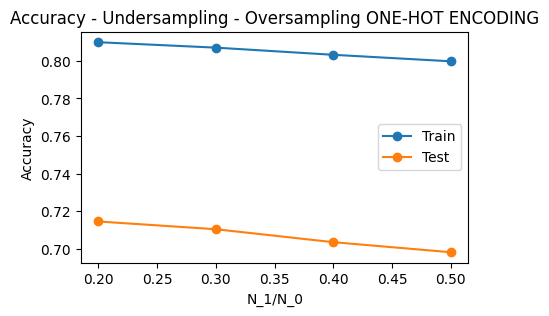

<Figure size 2000x1500 with 0 Axes>

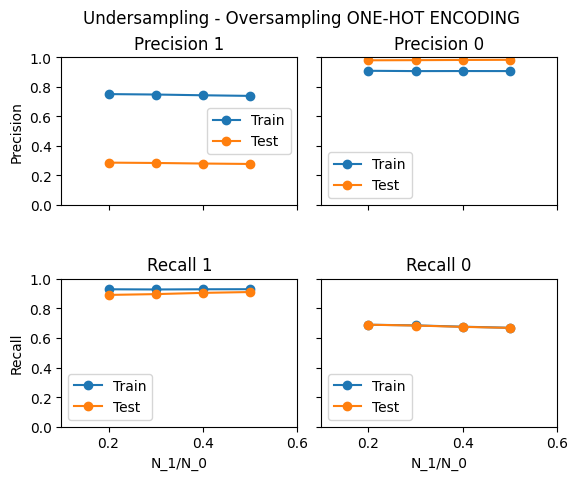

In [ ]:
model = LogisticRegression()
scores_train_under_over, scores_test_under_over = test_under_over_sampling(X_train_4, y_train_4, np.arange(0.2,0.6,0.1))

plot_comp_sampling_strategy(scores_train_under_over, scores_test_under_over,
                            x_ax = np.arange(0.2,0.6,0.1),
                            title = 'Undersampling - Oversampling ONE-HOT ENCODING')


Come nel caso precedente, si nota che al diminuire dell'undersampling aumenta l'accuratezza. Le altre metriche sono piuttosto costanti.

### One-hot encoding variabile Region_Code

Si è addestrato un ulteriore modello con la codifica secondo il metodo one-hot anche per la variabile Region_Code.

In [ ]:
df_4 = pd.get_dummies(df_3, columns=['Region_Code'])

In [ ]:
df_4.shape

(381109, 221)

In [ ]:
X = df_4.drop(np.concatenate((np.array(['id','Response']),col_drop)),axis = 1).values
y = df_4['Response'].values

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size = .2, random_state=0)

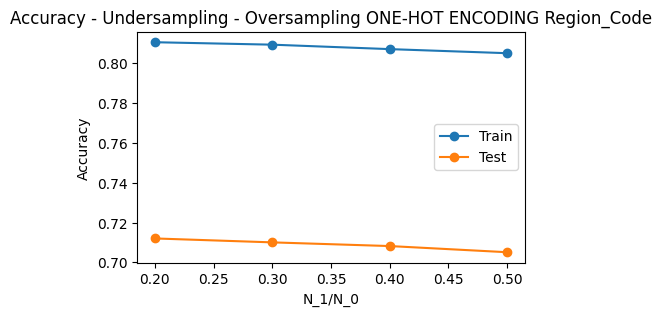

<Figure size 2000x1500 with 0 Axes>

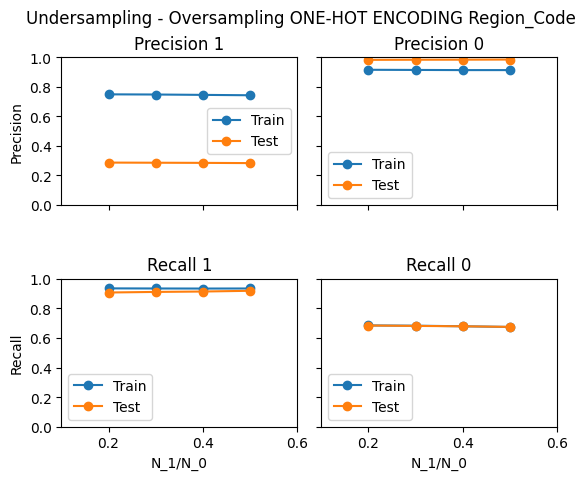

In [ ]:
model = LogisticRegression()

scores_train_under_over, scores_test_under_over = test_under_over_sampling(X_train_5, y_train_5, np.arange(0.2,0.6,0.1))

plot_comp_sampling_strategy(scores_train_under_over, scores_test_under_over,
                            x_ax = np.arange(0.2,0.6,0.1),
                            title = 'Undersampling - Oversampling ONE-HOT ENCODING Region_Code')

L'andamento dei valori delle metriche al variare del grado di undersampling è analogo ai due modelli precedenti.

### One-hot encoding di tutte le variabili qualitative

Infine si è provato ad addestrare diversi modelli utilizzando un dataset in cui tutte le variabili qualititive erano state codificate utilizzando il metodo one-hot encoding. Si è deciso di eliminare le colonne di Policy_Sales_Channe con un numero di osservazioni minori di 200 così da ridurre il numero totale di fuatures, comunque piuttosto alto.

In [ ]:
PATH = '/content/drive/MyDrive/MASTER DATA SCIENCE/4 - Fondamenti di Machine Learning/'
df_5 = pd.read_csv(PATH+'insurance_cross_sell.csv')

df_5 = pd.get_dummies(df_5, columns=var_qual[:-1])

X = df_5.drop(np.concatenate((np.array(['id','Response']),col_drop)),axis = 1).values
y = df_5['Response'].values

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, test_size = .2, random_state=0)

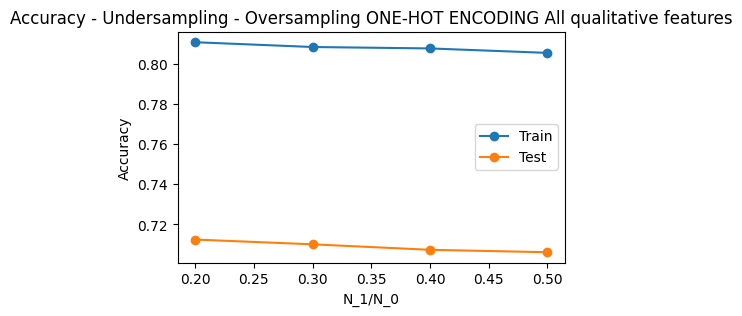

<Figure size 2000x1500 with 0 Axes>

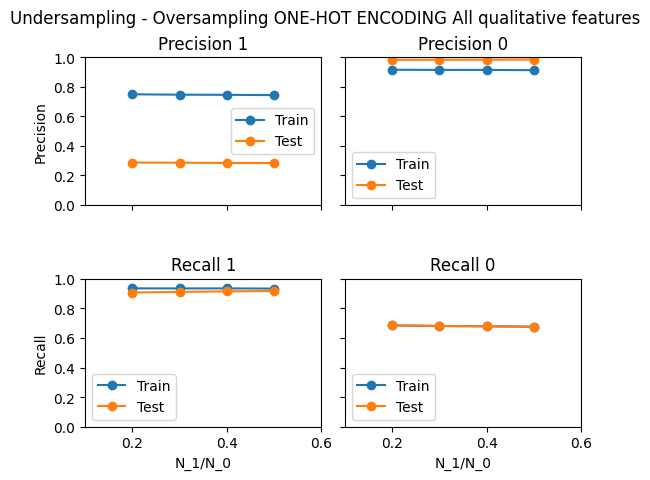

In [ ]:

model = LogisticRegression()

scores_train_under_over, scores_test_under_over = test_under_over_sampling(X_train_6, y_train_6, np.arange(0.2,0.6,0.1))

plot_comp_sampling_strategy(scores_train_under_over, scores_test_under_over,
                            x_ax = np.arange(0.2,0.6,0.1),
                            title = 'Undersampling - Oversampling ONE-HOT ENCODING All qualitative features')


### Oversampling

Infine, si è provato ad effettuare l'oversampling direttamente senza prima svolgere l'undersampling. Si è tentato tale approccio sia sul dateset con le variabili Gender, Vehicle_Age e Policy_Sales_Channel codificate utilizzando il metodo one-hote encoding (eliminando le colonne di Policy_Sales_Channel con meno di 200 osservazioni) sia utilizzando il metodo ordinal encoding. Per quanto concerne il one-hot encoding si è deciso di utilizzare il datset con il numero minore di variabili visto che le prestezioni erano del tutto simili a quelle ottenute con i dateset con un numero maggiore di variabili.

#### One-hot encoding

In [ ]:
model = LogisticRegression()

scores_train_over, scores_test_over = test_oversampling(X_train_4, y_train_4, np.arange(0.5,1.,0.1)+0.1)

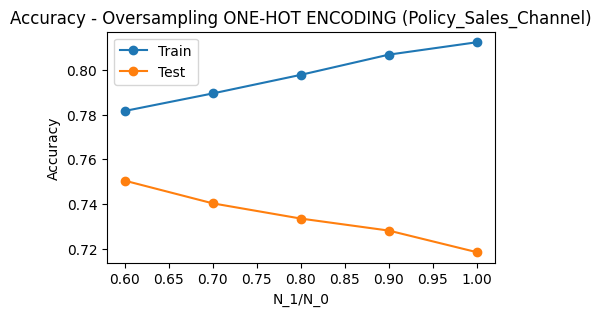

<Figure size 2000x1500 with 0 Axes>

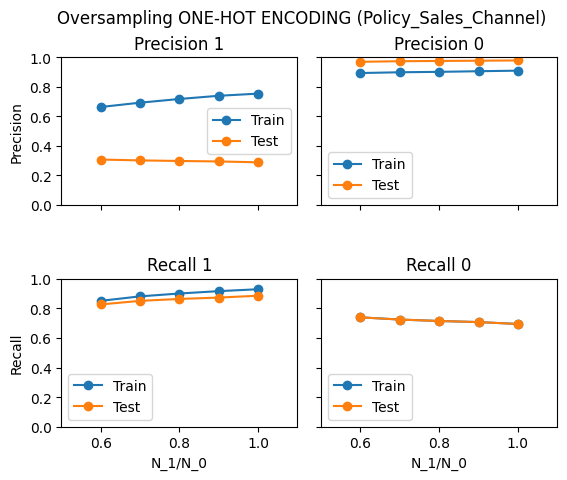

In [ ]:
plot_comp_sampling_strategy(scores_train_over, scores_test_over,
                            x_ax = np.arange(0.5,1.,0.1)+0.1,
                            title = 'Oversampling ONE-HOT ENCODING (Policy_Sales_Channel)')

#### Ordinal Encoding

In [ ]:
model = LogisticRegression()

scores_train_over, scores_test_over = test_oversampling(X_train_1, y_train_1, np.arange(0.5,1.,0.1)+0.1)

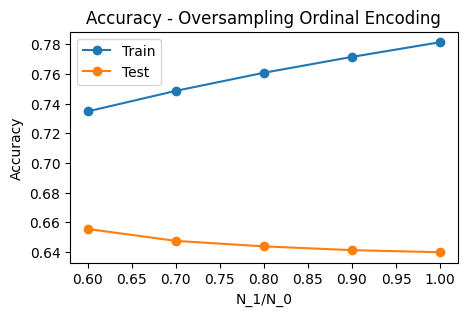

<Figure size 2000x1500 with 0 Axes>

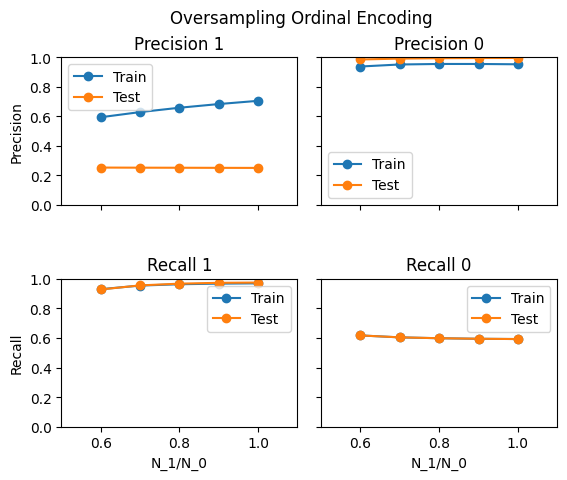

In [ ]:
plot_comp_sampling_strategy(scores_train_over, scores_test_over,
                            x_ax = np.arange(0.5,1.,0.1)+0.1,
                            title = 'Oversampling Ordinal Encoding')

Si nota che in entrambi i casi l'accuratezza diminuisce all'aumentare del grado di oversampling mentre il recall per la classe 1 tende ad aumentare leggermente per poi stabilizzarsi.

### Confronto modelli

Dopo aver stabilito i parametri delle funzioni di undersampling e oversampling valutando le diverse prove per ciascun dataset, sono stati addestrati 7 modelli utilizzando il Training Set estratto dal dataset originale prima di effettuare le prove di sampling. Le prestazioni dei modelli sono state valutate mediante i valori di accuratezza, precisione e recall ottenuti sui rispettivi Test Set.

In particolare sono stati addestrati i seguenti modelli:
* Modello 1: dataset originale con ordinal encoding
* Modello 2: dataset con undersampling e ordinal encoding
* Modello 3: dataset con undersampling, oversampling e ordinal encoding
* Modello 4: dataset con undersampling, oversampling e one-hot encoding delle variabili Gender, Vehicle_Age e Policy_Sales_Channel (con eliminazione delle colonne con meno di 200 osservazioni)
* Modello 5: dataset con undersampling, oversamling e one-hot encoding di tutte le variabili qualitative (con eliminazine delle colonne ocn meno di 200 osservazioni di Policy_Sales_Channel)
* Modello 6: dataset con oversampling e ordinal encoding
* Modello 7: dataset con oversampling e one-hot encoding (stesso dataset del Modello 4)


In [ ]:
# Original dataset with Ordinal Encoding
y_true = []
y_true.append(np.array(y_test_1))

model_1 = LogisticRegression()
sd = StandardScaler()
X_train_1 = sd.fit_transform(X_train_1)
X_test_1 = sd.transform(X_test_1)
model_1.fit(X_train_1,y_train_1)

y_predict = []
y_predict.append(model_1.predict(X_test_1))


#Under-sampling with Ordinal Encoding
model_2 = LogisticRegression()
X_under, y_under = under(X_train_1,y_train_1,0.7)
model_2.fit(X_under,y_under)

y_true.append(y_test_1)
y_predict.append(model_2.predict(X_test_1))


#Under&Over sampling with Ordinal Encoding
model_3 = LogisticRegression()
X_under_over, y_under_over = under_over(X_train_1,y_train_1,k_under = 0.5, k_over = 1)
model_3.fit(X_under_over,y_under_over)

y_true.append(y_test_1)
y_predict.append(model_3.predict(X_test_1))


In [ ]:
#Under&Over sampling with One-hot Encoding & drop columns Policy_Sales_Channel
model_4 = LogisticRegression()
sd = StandardScaler()
X_train_4 = sd.fit_transform(X_train_4)
X_test_4 = sd.transform(X_test_4)
X_under_over, y_under_over = under_over(X_train_4,y_train_4,k_under = 0.2, k_over = 1)
model_4.fit(X_under_over,y_under_over)

y_true.append(y_test_4)
y_predict.append(model_4.predict(X_test_4))


In [ ]:
#Under&Over sampling with One-hot Encoding All qualitative features & drop columns Policy_Sales_Channel
model_5 = LogisticRegression()
sd = StandardScaler()
X_train_6 = sd.fit_transform(X_train_6)
X_test_6 = sd.transform(X_test_6)
X_under_over, y_under_over = under_over(X_train_6,y_train_6,k_under = 0.2, k_over = 1)
model_5.fit(X_under_over,y_under_over)

y_true.append(y_test_6)
y_predict.append(model_5.predict(X_test_6))

In [ ]:
#Oversampling with Ordinal Encoding
sd = StandardScaler()
X_train_1 = sd.fit_transform(X_train_1)
X_test_1 = sd.transform(X_test_1)
model_6 = LogisticRegression()
X_over, y_over = oversampling(X_train_1,y_train_1,1)
model_6.fit(X_over,y_over)

y_true.append(y_test_1)
y_predict.append(model_6.predict(X_test_1))

In [ ]:
#Oversampling with One-hot Encoding & drop columns Policy_Sales_Channel
sd = StandardScaler()
X_train_4 = sd.fit_transform(X_train_4)
X_test_4 = sd.transform(X_test_4)
model_7 = LogisticRegression()
X_over, y_over = oversampling(X_train_4,y_train_4,0.6)
model_7.fit(X_over,y_over)

y_true.append(y_test_4)
y_predict.append(model_7.predict(X_test_4))

In [ ]:
model_comp = pd.DataFrame(columns=['precision','recall','f1-score','support','model','class'])
model_accuracy = pd.DataFrame(columns=['model','accuracy'])
for i in range(0,7):

    report = classification_report(y_true[i],y_predict[i], output_dict=True)

    dict_add={}
    dict_add = report['0']
    dict_add['model']=i+1
    dict_add['class']=0
    model_comp.loc[len(model_comp)] = dict_add

    dict_add={}
    dict_add = report['1']
    dict_add['model']=i+1
    dict_add['class']=1
    model_comp.loc[len(model_comp)] = dict_add

    dict_add={'model': i+1,
             'accuracy': report['accuracy']}
    model_accuracy.loc[len(model_accuracy)] = dict_add



<Figure size 3000x1000 with 0 Axes>

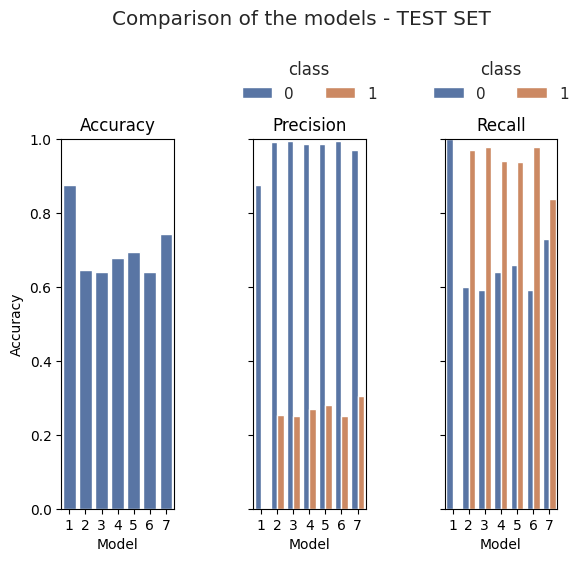

In [ ]:
plt.figure(figsize = (30,10))
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharex=True, sharey = True)
sns.set_theme()
acc = sns.barplot(data=model_accuracy, x='model', y='accuracy', ax = ax1, color=sns.color_palette()[0])
prec = sns.barplot(data=model_comp, x='model', y='precision', hue = 'class', ax = ax2)
rec = sns.barplot(data=model_comp, x='model', y='recall', hue = 'class', ax = ax3)
sns.move_legend(prec, loc = 'upper center', bbox_to_anchor=(0.5,1.25), ncol = 2, frameon = False)
sns.move_legend(rec, loc = 'upper center', bbox_to_anchor=(0.5,1.25), ncol = 2, frameon = False)
plt.subplots_adjust(wspace=0.7)
ax1.set_xlabel('Model')
ax2.set_xlabel('Model')
ax3.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Precision')
ax3.set_ylabel('Recall')
ax1.set_title('Accuracy')
ax2.set_title('Precision')
ax3.set_title('Recall')
plt.ylim([0,1])
fig.suptitle('Comparison of the models - TEST SET', y = 1.15)
plt.show()


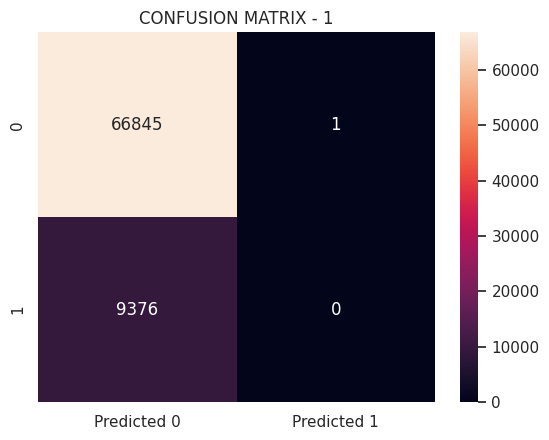

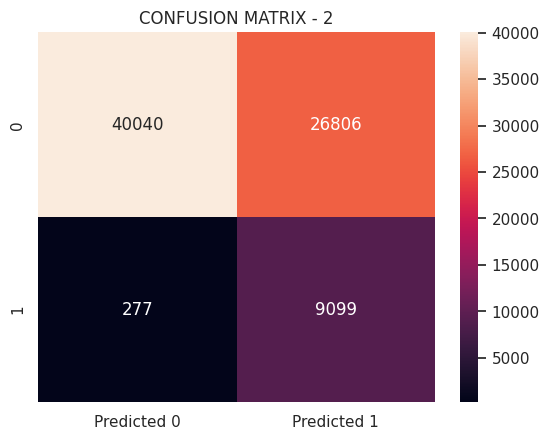

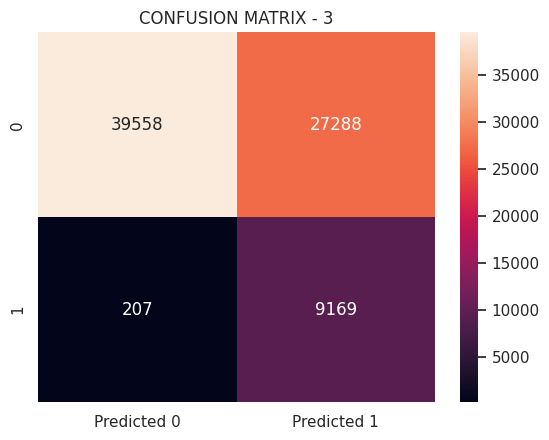

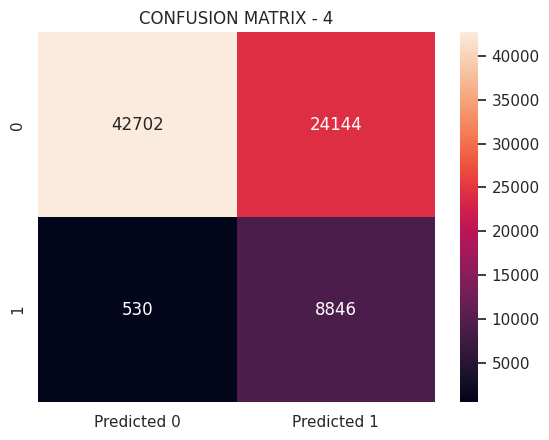

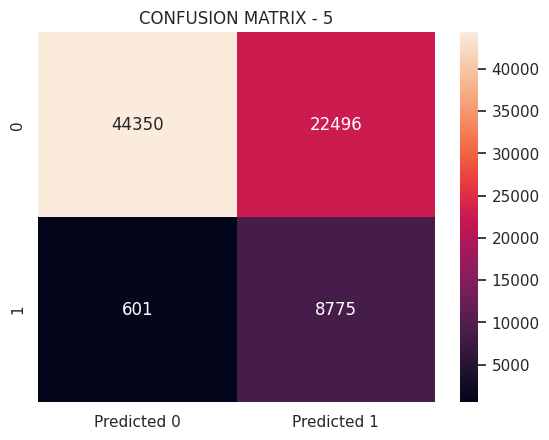

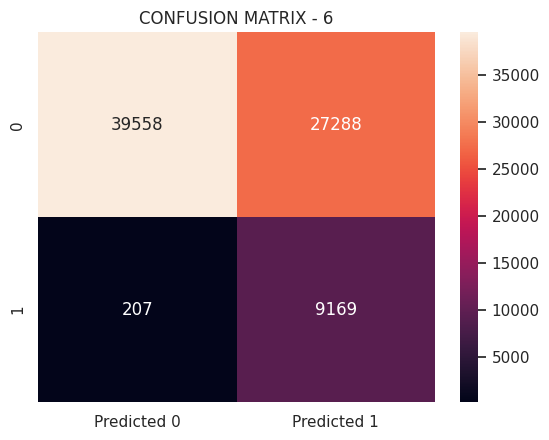

In [ ]:
for i in range(0,6):

  cm = confusion_matrix(y_true[i], y_predict[i])

  df_cm = pd.DataFrame(cm,
                      index = ['0','1'],
                      columns = ['Predicted 0', 'Predicted 1'])

  plt.figure()
  sns.heatmap(df_cm, annot = True, fmt = 'g')
  plt.title('CONFUSION MATRIX - '+str(i+1))
  plt.show()

Si nota che il sampling del dataset ha prodotto un aumento significativo del recall della classe 1 nonchè della precisione della classe 0 e della classe 1, quest'ultima tuttavia resta piuttosto bassa. L'aumento di tali metriche è stato accompagnato da una diminuzione dell'accuratezza. I modelli che mostrano le prestazioni migliori in terminini di recall della classe 1 e precisione sulla classe 0 sono i modelli 2,3 e 6, ossia quelli che utilizzano l'ordinal encoding delle variabili qualitative. I modelli 4,5 e 7, invece, sono caratterizzati da valori di recall leggermente inferiori rispetto agli altri tre ma hanno un valore di accuratezza superiore.

Considerando lo scopo del classificatore, si è deciso di dare molto peso nella scelta del modello al recall della classe 1 così da essere certi di classificare correttamente un'alta percentuale degli utenti interessati a sottoscrivere la polizza (classe 1). Fatte queste considerazioni è stato scelto il modello 3 di cui sono riportate le metriche e la ROC curve con valore di AUC.

In [ ]:
print(classification_report(y_true[2],y_predict[2]))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66846
           1       0.25      0.98      0.40      9376

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



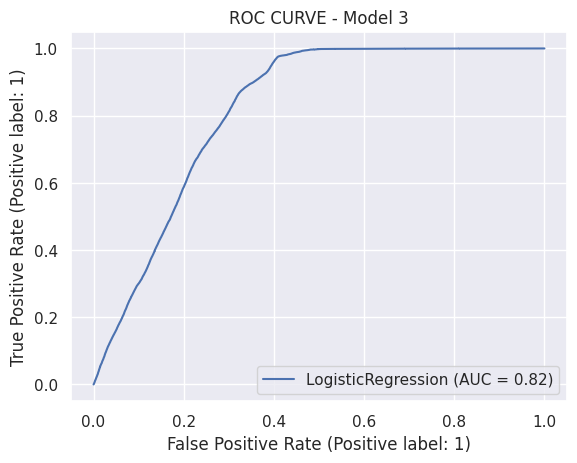

In [ ]:
X_under_over, y_under_over = under_over(X_train_1,y_train_1,k_under = 0.5, k_over = 1)
RocCurveDisplay.from_estimator(model_3, X_under_over, y_under_over)
plt.title('ROC CURVE - Model 3')
plt.show()

### Conclusioni
Si è partiti creando un primo modello utilizzando l'intero dataset, questo si è dimostrato poco idoneo alla classificazione in quanto non in grado di classificare le osservazioni appartenti alla classe 1 a causa dello sbilanciamento del dataset. Sono state testate diverse tecniche quali undersampling, oversampling e la loro combinazione per risolvere tale problema. Inoltre, si è provato a codificare le variabili qualitative sia utilizzando l'ordinal encoding che il one-hot encoding. In generale, in seguito alla manipolazione del dataset è sensibilmente aumentato il recall per la classe 1 e la precisione per la classe 0 a fronte di una diminuzione del recall della classe 0 e dell'accuratezza.
Il valore alto di recall per la classe 1 (0.98) è indice della capacità del modello di classificare correttamente le osservazioni appartenti alla classe 1 il che potrebbe essere particolarmente utile per lo scopo di questo modello, visto che tali osservazioni corrispondono a nuovi clienti per questo prodotto. Analogamente in un'ottica di ottimizzazione che potrebbe mirare a non contattare clienti che non sottoscriveranno una polizza, l'alta precisione sulla classe 0 (0.99) è altrettanto importante per evitare di escludere potenziali clienti.